# Descarga y manipulación de históricos de precios
___

## 1. Uso de Pandas para bajar datos de Yahoo! Finance
En primer lugar, para poder bajar precios de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usarán el Scipy y el Numpy para las matemáticas necesarias y, el Matplotlib para hacer gráficos de las series de datos.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

**Nota:** Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete `pandas_datareader`. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda: `conda install -c anaconda pandas-datareader`

**Referencia:**
https://anaconda.org/anaconda/pandas-datareader
___

In [15]:
#Descargar datos de Yahoo! finance
#Tickers
tickers = ['AA','AAPL','MSFT', '^GSPC']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2014 hasta 12/31/2016.
start_date = '2014-01-01'
end_date = '2016-12-31'
# Usar el pandas data reader. El comando sort_index ordena los datos por fechas
assets = (web.DataReader(tickers, data_source, start_date, end_date)).sort_index('major_axis')

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBUR.MX* y *GFNORTE.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Alcoa: AA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *assets*, que tiene la siguiente estructura:

In [16]:
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

___
El objeto *assets* tiene tres características: *items*, *major_axis* y *minor_axis*. Con estos, se pueden encontrar todos los registros almacenados.

In [17]:
assets.items

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [18]:
assets.major_axis

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

In [19]:
assets.minor_axis

Index(['AA', 'AAPL', 'MSFT', '^GSPC'], dtype='object')

De esta forma, es ordenar y acceder a los datos de una forma simple e intuitiva. Por ejemplo: los precios de cierre de Microsoft.

In [20]:
assets['Adj Close']['MSFT']

Date
2014-01-02    33.522
2014-01-03    33.297
2014-01-06    32.593
2014-01-07    32.846
2014-01-08    32.259
               ...  
2016-12-23    61.859
2016-12-27    61.898
2016-12-28    61.614
2016-12-29    61.526
2016-12-30    60.783
Name: MSFT, Length: 756, dtype: float64

O, los precios de apertura de Apple

In [21]:
assets['Open']['AAPL']

Date
2014-01-02     79.383
2014-01-03     78.980
2014-01-06     76.779
2014-01-07     77.760
2014-01-08     76.973
               ...   
2016-12-23    115.590
2016-12-27    116.520
2016-12-28    117.520
2016-12-29    116.450
2016-12-30    116.650
Name: AAPL, Length: 756, dtype: float64

También, los precios de cierre en la fecha *2014-01-14*

In [46]:
assets.major_xs('2014-01-14')['Close']

AA         24.799
AAPL       78.056
MSFT       35.780
^GSPC    1838.880
Name: Close, dtype: float64

O, finalmente, los valores del S&P500

In [23]:
assets.minor_xs('^GSPC')

            Adj Close    Close     High      Low     Open     Volume
Date                                                                
2014-01-02    1831.98  1831.98  1845.86  1827.74  1845.86  3.081e+09
2014-01-03    1831.37  1831.37  1838.24  1829.13  1833.21  2.774e+09
2014-01-06    1826.77  1826.77  1837.16  1823.73  1832.31  3.295e+09
2014-01-07    1837.88  1837.88  1840.10  1828.71  1828.71  3.512e+09
2014-01-08    1837.49  1837.49  1840.02  1831.40  1837.90  3.652e+09
...               ...      ...      ...      ...      ...        ...
2016-12-23    2263.79  2263.79  2263.79  2258.84  2260.25  2.021e+09
2016-12-27    2268.88  2268.88  2273.82  2266.15  2266.23  1.987e+09
2016-12-28    2249.92  2249.92  2271.31  2249.11  2270.23  2.392e+09
2016-12-29    2249.26  2249.26  2254.51  2244.56  2249.50  2.336e+09
2016-12-30    2238.83  2238.83  2253.58  2233.62  2251.61  2.671e+09

[756 rows x 6 columns]

De donde, se pueden seleccionar los precios de cierre y ajustados en el cierre

In [35]:
assets.minor_xs('^GSPC')[['Adj Close', 'Close']]

            Adj Close    Close
Date                          
2014-01-02    1831.98  1831.98
2014-01-03    1831.37  1831.37
2014-01-06    1826.77  1826.77
2014-01-07    1837.88  1837.88
2014-01-08    1837.49  1837.49
...               ...      ...
2016-12-23    2263.79  2263.79
2016-12-27    2268.88  2268.88
2016-12-28    2249.92  2249.92
2016-12-29    2249.26  2249.26
2016-12-30    2238.83  2238.83

[756 rows x 2 columns]

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

## 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios de cierre de Microsoft, así como el volumen de transacciones.

In [47]:
msftAC = assets['Adj Close']['MSFT']
msftV = assets['Volume']['MSFT']
msftAC

Date
2014-01-02    33.522
2014-01-03    33.297
2014-01-06    32.593
2014-01-07    32.846
2014-01-08    32.259
               ...  
2016-12-23    61.859
2016-12-27    61.898
2016-12-28    61.614
2016-12-29    61.526
2016-12-30    60.783
Name: MSFT, Length: 756, dtype: float64

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

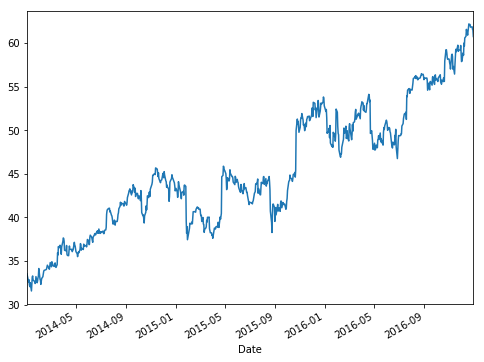

In [52]:
msftAC.plot(figsize=(8,6));

De forma similar, se grafica la serie de volúmenes de transacción

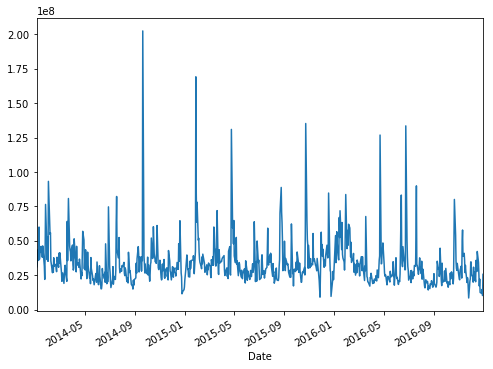

In [53]:
msftV.plot(figsize=(8,6));

O se pueden obtener los precios de cierre de todas las compañías

In [54]:
allAC = assets['Adj Close']
allAC

                AA     AAPL    MSFT    ^GSPC
Date                                        
2014-01-02  24.486   73.259  33.522  1831.98
2014-01-03  24.579   71.650  33.297  1831.37
2014-01-06  24.486   72.041  32.593  1826.77
2014-01-07  24.509   71.525  32.846  1837.88
2014-01-08  25.183   71.978  32.259  1837.49
...            ...      ...     ...      ...
2016-12-23  29.710  114.676  61.859  2263.79
2016-12-27  29.650  115.404  61.898  2268.88
2016-12-28  29.430  114.912  61.614  2249.92
2016-12-29  28.890  114.883  61.526  2249.26
2016-12-30  28.080  113.987  60.783  2238.83

[756 rows x 4 columns]

y graficarlos

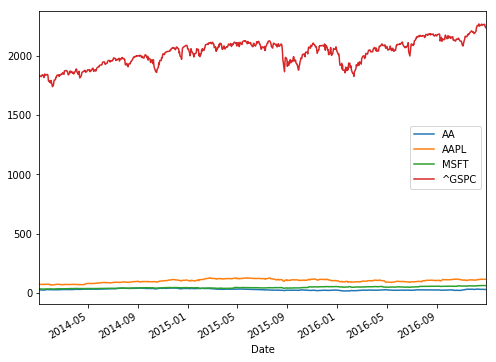

In [56]:
assets['Adj Close'].plot(figsize=(8,6));

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

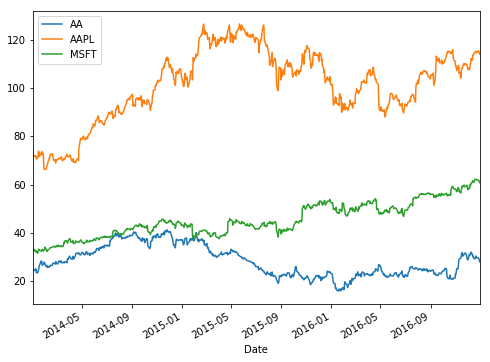

In [58]:
assets['Adj Close'][['AA', 'AAPL', 'MSFT']].plot(figsize=(8,6));

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con si volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Microsoft.

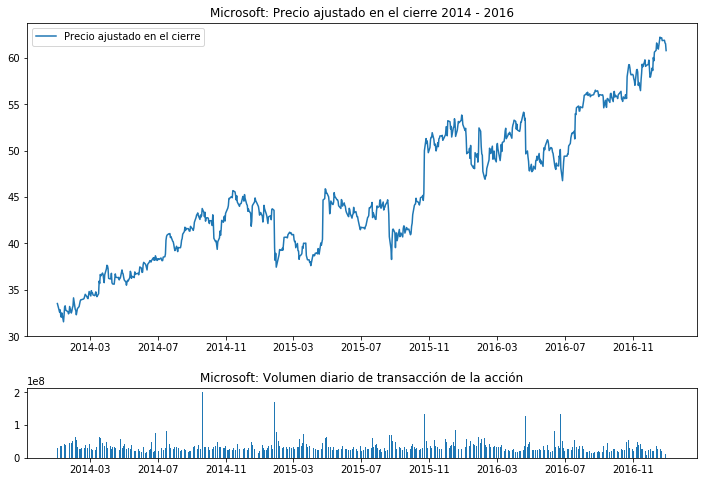

In [85]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(msftAC.index, msftAC, label='Precio ajustado en el cierre')
plt.title('Microsoft: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
bottom = plt.subplot2grid((4,4), (3, 0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

## 3. Cálculo de los rendimientos (próxima clase)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>